# 시계열 데이터
## 1. Numpy의 polyfit으로 회귀(regression) 분석하기

In [4]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet
from datetime import datetime
import yfinance as yf


In [5]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system..')

In [6]:
pweb = pd.read_csv('../data/08. PinkWink Web Traffic.csv',
                  encoding = 'utf-8', thousands = ',',
                  names = ['date', 'hit'], index_col= 0) # date와 hit만 출력

pweb = pweb[pweb['hit'].notnull()] # hit 에서 notnull인것만 출력
print(pweb.head())
print(pweb.tail())

             hit
date            
16. 7. 1.  766.0
16. 7. 2.  377.0
16. 7. 3.  427.0
16. 7. 4.  902.0
16. 7. 5.  850.0
               hit
date              
17. 6. 26.  1309.0
17. 6. 27.  1436.0
17. 6. 28.  1387.0
17. 6. 29.  1328.0
17. 6. 30.  1193.0


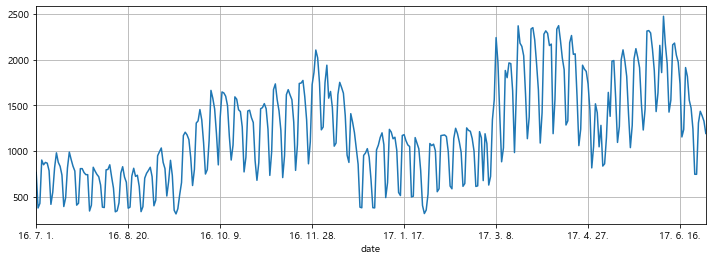

In [7]:
pweb['hit'].plot(figsize=(12,4), grid=True);

In [13]:
time = np.arange(0, len(pweb)) # 범위 지정
traffic = pweb['hit'].values # 방문자 수( pweb['hit']의 값)
fx = np.linspace(0, time[-1], 1000)
print(fx)


[  0.           0.36436436   0.72872873   1.09309309   1.45745746
   1.82182182   2.18618619   2.55055055   2.91491491   3.27927928
   3.64364364   4.00800801   4.37237237   4.73673674   5.1011011
   5.46546547   5.82982983   6.19419419   6.55855856   6.92292292
   7.28728729   7.65165165   8.01601602   8.38038038   8.74474474
   9.10910911   9.47347347   9.83783784  10.2022022   10.56656657
  10.93093093  11.2952953   11.65965966  12.02402402  12.38838839
  12.75275275  13.11711712  13.48148148  13.84584585  14.21021021
  14.57457457  14.93893894  15.3033033   15.66766767  16.03203203
  16.3963964   16.76076076  17.12512513  17.48948949  17.85385385
  18.21821822  18.58258258  18.94694695  19.31131131  19.67567568
  20.04004004  20.4044044   20.76876877  21.13313313  21.4974975
  21.86186186  22.22622623  22.59059059  22.95495495  23.31931932
  23.68368368  24.04804805  24.41241241  24.77677678  25.14114114
  25.50550551  25.86986987  26.23423423  26.5985986   26.96296296
  27.3273273

In [14]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

#y= ax^2 + bx + c
# x = 입력값 

In [19]:
# polyfit(x, y, n) : x : 다항식의 입력값, y : 다항식의 결과값, n : 차수
# p는 차수에 따른 다항식의 계수값
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)
#print(fp1)
#print(f1)

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)
#print(f2p)
#print(f2)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

print(error(f1, time, traffic)) # 오차 출력
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

[  2.94751137 678.39950595]
 
2.948 x + 678.4
[-1.42164283e-03  3.46498936e+00  6.47092087e+02]
           2
-0.001422 x + 3.465 x + 647.1
430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


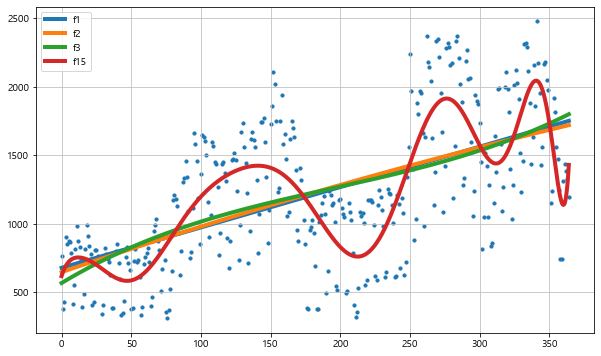

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle = '-', color = '0.75')

plt.legend(loc=2)
plt.show()

# Prophet 모듈을 이용한 forecast 예측

In [81]:
df = pd.DataFrame({'ds':pweb.index, 'y':pweb['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format = '%y. %m. %d.')
del df['date']

#Prophet 클래스 객체를 만 들고 시계열 데이터를 입력으로
#fit 메서드를 호출한다.
m = Prophet(yearly_seasonality = True, daily_seasonality= True) # daily_seasonality= True
m.fit(df);

#yearly_seasonalit = True : Prophet()를 사용할 때 주기성이
#연 단위임을 알려줌

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0
...,...,...
360,2017-06-26,1309.0
361,2017-06-27,1436.0
362,2017-06-28,1387.0
363,2017-06-29,1328.0


In [37]:
#make_future_dataframe: 예측 날짜 구간 생성
# 원래 2017.06.30 방문기록 있음
future = m.make_future_dataframe(periods=60) # periods = 60 : 60일간
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [38]:
#predict: 신뢰 구간을 포함한 예측 실행
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,911.790860,687.959106,1115.245778
421,2017-08-26,496.917939,284.178841,704.065134
422,2017-08-27,629.458439,418.963327,836.924649
423,2017-08-28,1181.938386,983.079419,1388.729305
424,2017-08-29,1217.864960,1011.533201,1428.188115


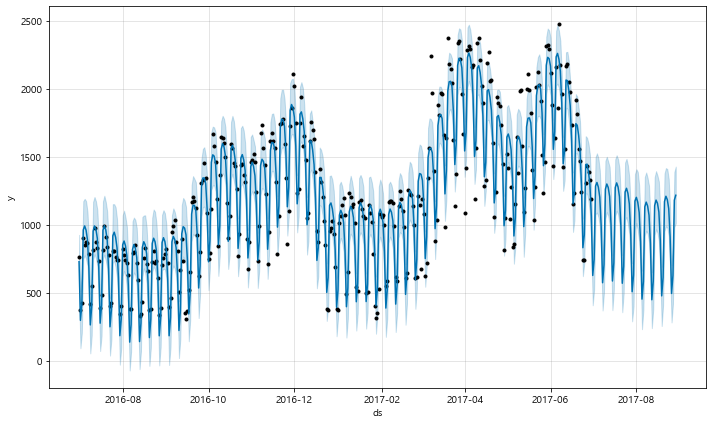

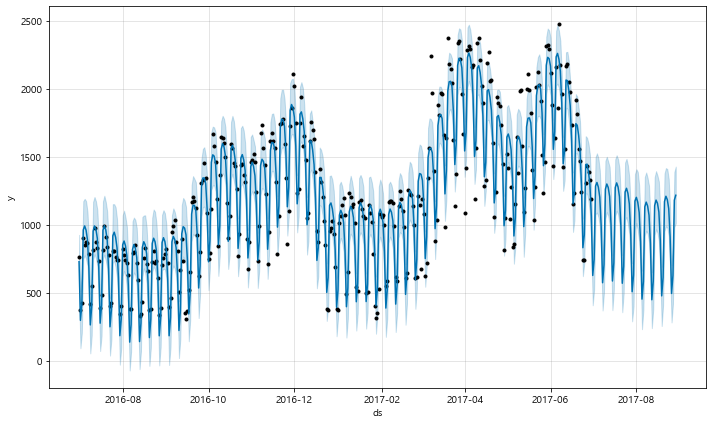

In [42]:
#plot : 원래의 시계열데이터와 예측 데이터
m.plot(forecast)

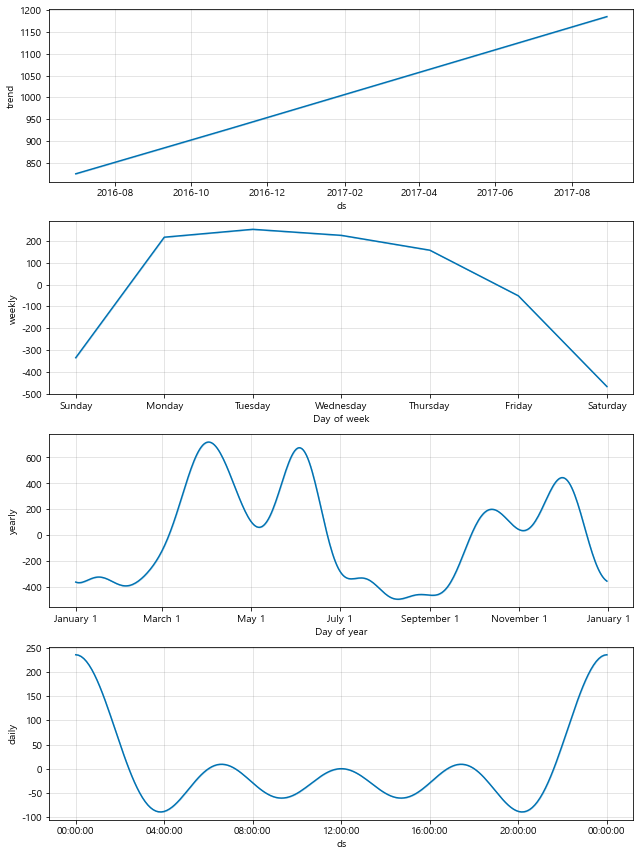

In [40]:
# plot_components: 선형회귀 및 계절성 성분별로 분리
m.plot_components(forecast);

## 7-3. Seasonal 시계열 분석으로 주식 데이터 분석하기

In [43]:
from pandas_datareader import data

In [44]:
# yahoo
start = datetime(2020, 1, 1)
end = datetime(2020, 6, 2)

df = data.DataReader("^KS11", "yahoo", start, end) # ^KS11 = 코스피
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,2202.320068,2171.840088,2201.209961,2175.169922,494700,2175.169922
2020-01-03,2203.379883,2165.389893,2192.580078,2176.459961,631600,2176.459961
2020-01-06,2164.419922,2149.949951,2154.969971,2155.070068,592700,2155.070068
2020-01-07,2181.620117,2164.270020,2166.600098,2175.540039,568200,2175.540039
2020-01-08,2162.320068,2137.719971,2156.270020,2151.310059,913800,2151.310059


In [47]:
start_date = '2009-7-1'
end_date = '2019-7-31'
# 삼성전자 (005930.KS)
SAM = data.get_data_yahoo('005930.KS' , start_date, end_date)
SAM_trunc=SAM[:'2017-6-30']
SAM.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-07-01,12120.0,11800.0,11880.0,12060.0,14641400.0,9696.331055
2009-07-02,12200.0,12000.0,12200.0,12040.0,12677100.0,9680.255859
2009-07-03,12040.0,11880.0,11900.0,12020.0,11348350.0,9664.174805
2009-07-06,12820.0,12180.0,12200.0,12680.0,46675200.0,10194.818359
2009-07-07,13120.0,12860.0,12980.0,13000.0,30934250.0,10452.100586


In [49]:
data.get_data_yahoo('GME' , '2021-01-01', '2021-05-27')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,19.799999,18.799999,19.250000,18.840000,6922700,18.840000
2021-01-04,19.100000,17.150000,19.000000,17.250000,10022500,17.250000
2021-01-05,18.080000,17.230000,17.350000,17.370001,4961500,17.370001
2021-01-06,18.980000,17.330000,17.340000,18.360001,6056200,18.360001
2021-01-07,19.450001,18.020000,18.469999,18.080000,6129300,18.080000
...,...,...,...,...,...,...
2021-05-20,174.910004,166.899994,170.789993,170.490005,2478200,170.490005
2021-05-21,179.240005,170.330002,171.000000,176.789993,3648400,176.789993
2021-05-24,188.460007,173.350006,175.850006,180.009995,4664300,180.009995


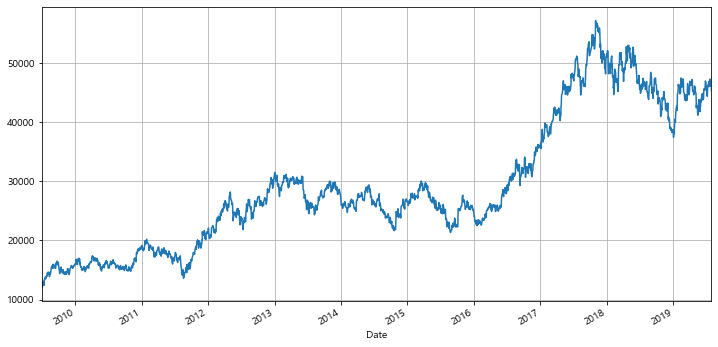

In [51]:
SAM['Close'].plot(figsize=(12, 6), grid=True);

In [52]:
#start_date = '2009-7-1'
#end_date = 2019-7-31
SAM_trunc=SAM[:'2016-12-31']
SAM_trunc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-07-01,12120.0,11800.0,11880.0,12060.0,14641400.0,9696.331055
2009-07-02,12200.0,12000.0,12200.0,12040.0,12677100.0,9680.255859
2009-07-03,12040.0,11880.0,11900.0,12020.0,11348350.0,9664.174805
2009-07-06,12820.0,12180.0,12200.0,12680.0,46675200.0,10194.818359
2009-07-07,13120.0,12860.0,12980.0,13000.0,30934250.0,10452.100586
...,...,...,...,...,...,...
2016-12-23,36080.0,35600.0,36020.0,35640.0,8334850.0,30874.564453
2016-12-26,36000.0,35560.0,35600.0,35960.0,4823600.0,31151.775391
2016-12-27,36200.0,35860.0,35980.0,35980.0,4653450.0,31169.105469


In [55]:
df = pd.DataFrame({'ds' : SAM_trunc.index, 'y' : SAM_trunc['Close']})
df.reset_index(inplace = True)
del df['Date']
df.head()

,ds,y
0,2009-07-01,12060.0
1,2009-07-02,12040.0
2,2009-07-03,12020.0
3,2009-07-06,12680.0
4,2009-07-07,13000.0


In [57]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [59]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2223,2017-12-25
2224,2017-12-26
2225,2017-12-27
2226,2017-12-28
2227,2017-12-29


In [61]:
forecast = m.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2223,2017-12-25,38462.031368,35389.920938,41558.279082
2224,2017-12-26,38451.144445,35311.571703,41918.607281
2225,2017-12-27,38385.809569,35461.133352,41464.003846
2226,2017-12-28,38355.889456,35202.996720,41571.161882
2227,2017-12-29,38264.217532,35248.440354,41474.814140


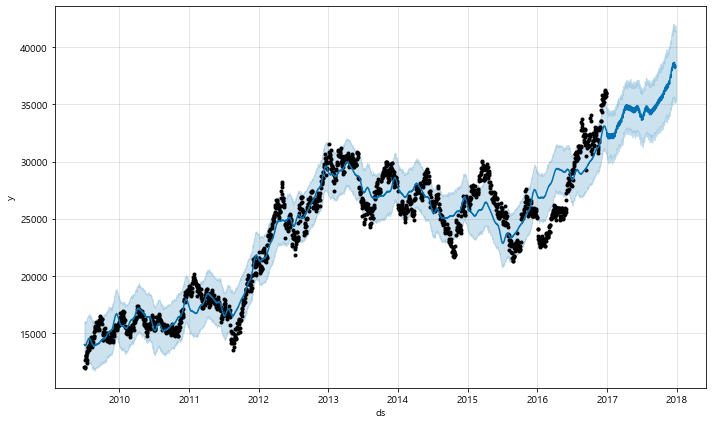

In [62]:
m.plot(forecast);

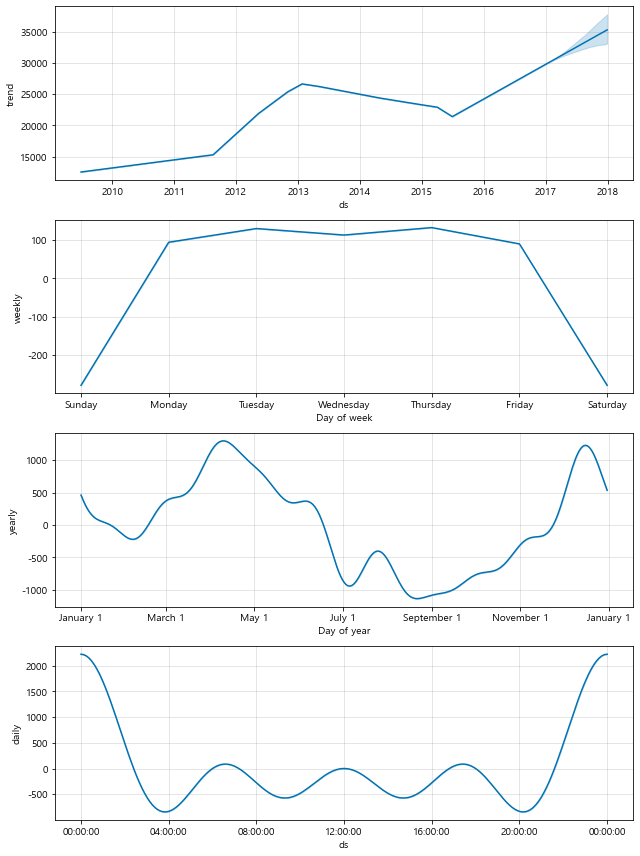

In [63]:
m.plot_components(forecast);

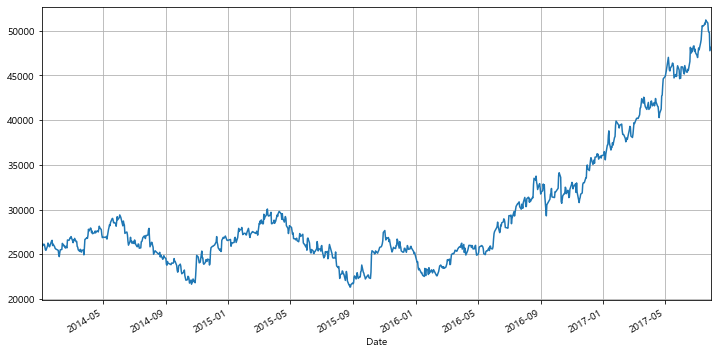

In [64]:
start_date = '2014-1-1'
end_date = '2017-7-31'
SAM = data.get_data_yahoo('005930.KS', start_date, end_date)
SAM['Close'].plot(figsize=(12,6), grid=True);


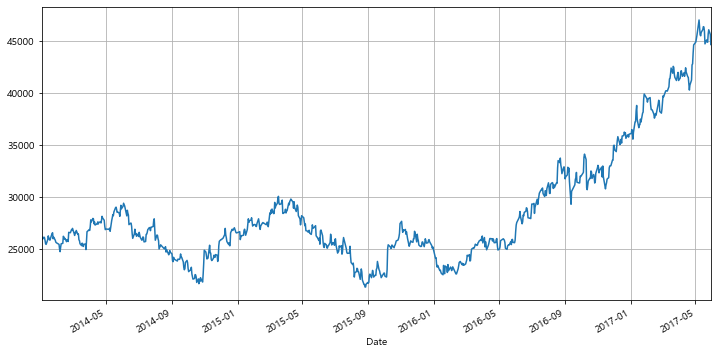

In [65]:
# 일부 데이터를 잘라서 forecast를 수행 ==>
# '2014-1-1' ~ '2017-5-31'

SAM_trunc = SAM[:'2017-05-31'] # 2014-1-1 ~ 2017-05-31
SAM_trunc['Close'].plot(figsize=(12,6), grid=True);

In [66]:
df = pd.DataFrame({'ds': SAM_trunc.index, 'y':SAM_trunc['Close']})
df.reset_index(inplace = True)
del df['Date']

In [67]:
m = Prophet(daily_seasonality=True)
m.fit(df);

In [69]:
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


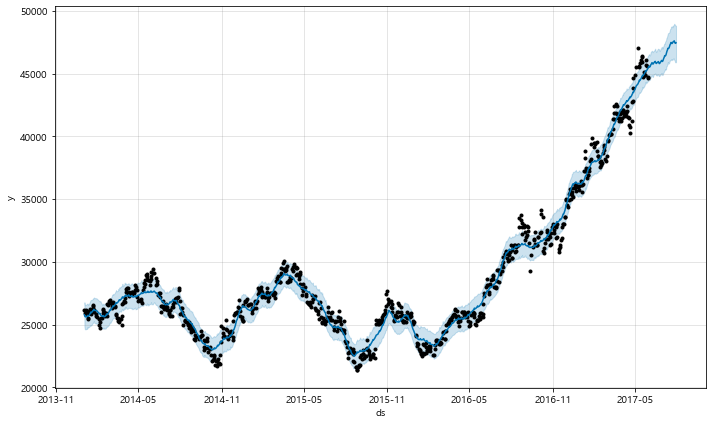

In [71]:
# 61일간을 예측 -- 상승 추세
forecast = m.predict(future)
m.plot(forecast);

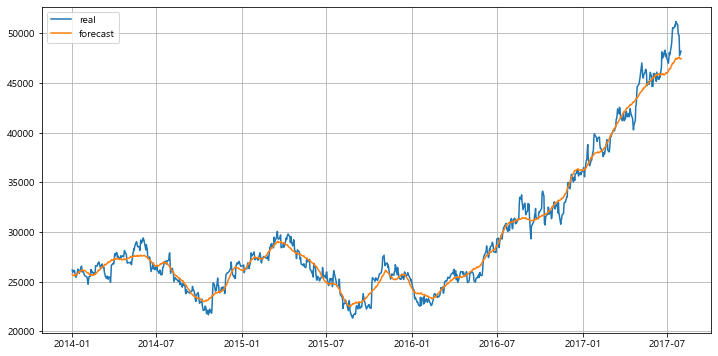

In [73]:
plt.figure(figsize = (12,6))
plt.plot(SAM.index, SAM['Close'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

# Growth Model

In [74]:
df = pd.read_csv('../data/08. example_wp_R.csv')
df['y'] = np.log(df['y'])
df

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797
...,...,...
2858,2015-12-11,7.834788
2859,2015-12-12,7.360104
2860,2015-12-13,7.479864
2861,2015-12-18,7.765145


In [75]:
df['cap'] = 8.5 # 상한값
df['floor'] = 6 # 하한값

In [76]:
m = Prophet(growth='logistic', daily_seasonality=True)
m.fit(df)

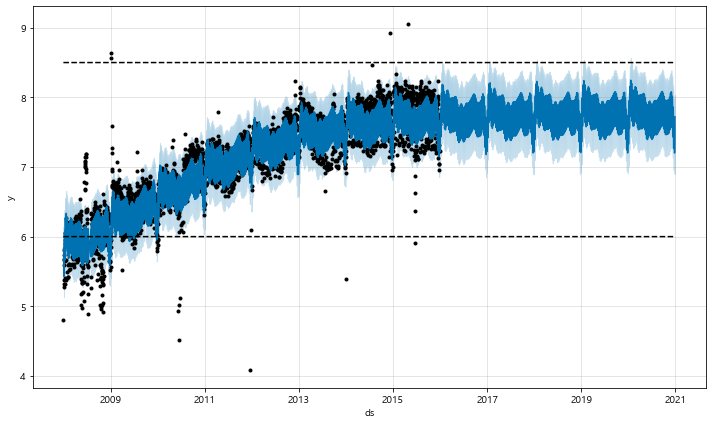

In [77]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5 # 상한값
future['floor'] = 6 # 하한값
fcst = m.predict(future)
m.plot(fcst);

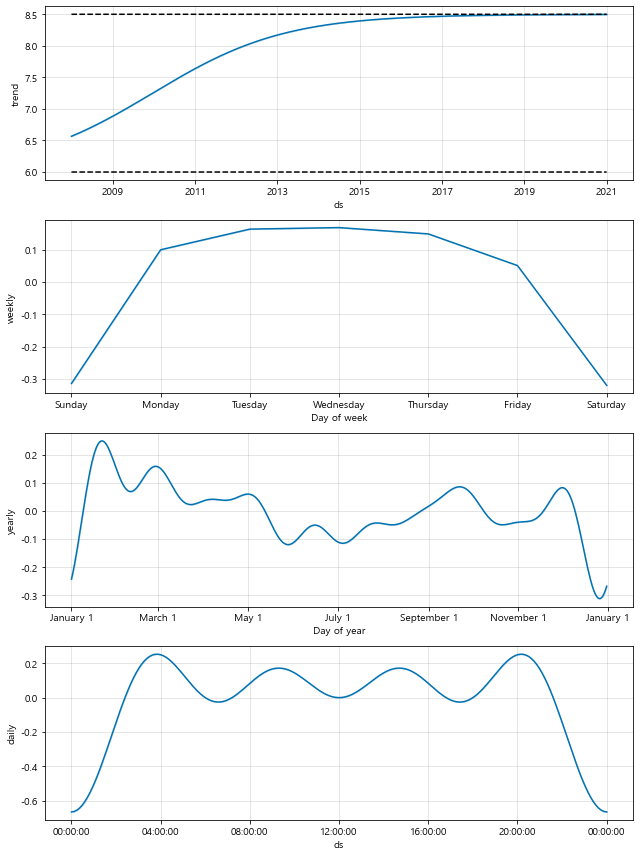

In [78]:
forecast = m.predict(future)
m.plot_components(forecast);